### Working with Time Series in Pandas

This course is owned by Datacamp.com and notebook has only the purpose of learn, teach and help others 

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

In [2]:
#libraries
import pandas as pd 
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

-Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. 

-Use the arguments start and periods. Assign the result to seven_days.
Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.

In [3]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


#### Time series transformation
You can change the frequency to a higher or lower value: upsampling involves increasing the time frequency, which requires generating new data. Downsampling means decreasing the time frequency,

##### Create a time series of air quality data

-Inspect data using .info().


-Use pd.to_datetime to convert the column 'date' to dtype datetime64.


-Set the 'date' column as index.


-Validate the changes by inspecting data using .info() again.


-Plot data using subplots=True.

In [4]:
#Loading data
data=pd.read_csv("Datasets/air_quality_Data-/nyc.csv")

#Inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


Look, date is an object and not a date 

In [5]:
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True) #inplace dont create copy

# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


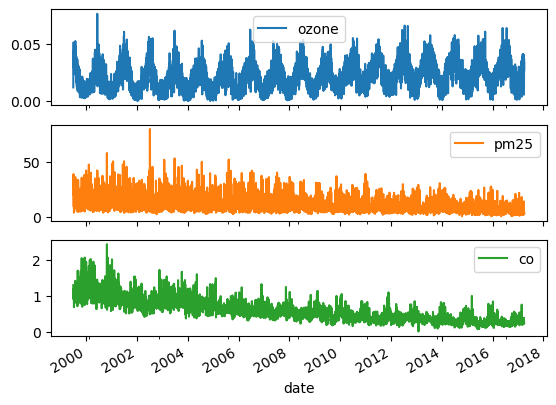

In [6]:
# Plot data
data.plot(subplots=True)
plt.show()

##### Compare annual stock price trends

Compare the performance for three years of Yahoo stock prices:

1. Create an empty pd.DataFrame() called prices.
2. Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:

 2.1 Use the iteration variable to select the data for this year and the column price.


 2.2. Use .reset_index() with drop=True to remove the DatetimeIndex.


 2.3 Rename the column price column to the appropriate year.


 2.4 Use pd.concat() to combine the yearly data with the data in prices along axis=1.

 
7. Plot prices.


In [7]:
#Loading data
yahoo=pd.read_csv("Datasets/Stock_data-/yahoo.csv")

#Inspect data
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [8]:
# Convert the date column to datetime64
yahoo.date = pd.to_datetime(yahoo.date)

# Set date column as index
yahoo.set_index('date', inplace=True) #inplace dont create copy

yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [9]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

#print head prices
prices.info()
prices.head(10)   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    252 non-null    float64
 1   2014    252 non-null    float64
 2   2015    252 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
5,19.33,41.02,50.23
6,18.99,40.92,49.72
7,19.29,41.23,48.80
8,19.43,39.99,48.30
9,19.52,41.14,47.51


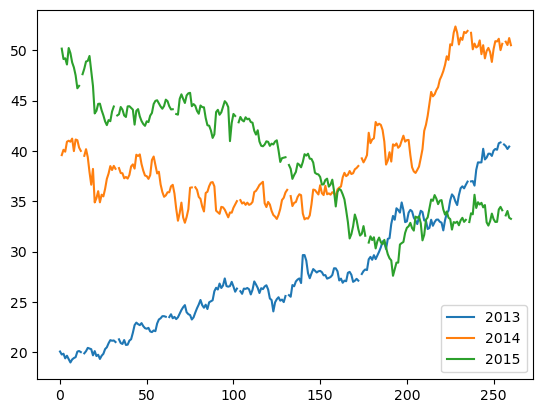

In [10]:
# Plot prices
prices.plot()
plt.show()

##### Set and change time series frequency

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.


1.Inspect co using .info()


2.Use .asfreq() to set the frequency to calendar daily.


3.Show a plot of 'co' using subplots=True.


4.hange the the frequency to monthly using the alias 'M'.


5.Show another plot of co using subplots=True.


In [11]:
#Loading data
co=pd.read_csv("Datasets/air_quality_Data-/co_cities.csv")

# show part of data
co.head(10)

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761
5,2005-01-07,0.625000,0.584556,0.735915
6,2005-01-08,0.608334,0.173052,0.815625
7,2005-01-09,0.397917,0.115987,0.619081
8,2005-01-10,0.577083,0.157382,0.668750
9,2005-01-11,0.522917,0.141825,0.786458


In [12]:
#Inspect data
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB


In [13]:
# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)

# Set date column as index
co.set_index('date', inplace=True) #inplace dont create copy

co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB


In [14]:
# Set the frequency to calendar daily
co = co.asfreq('D')

In [15]:
co.head(10)

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-02,NaN,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
2005-01-07,0.625000,0.584556,0.735915
2005-01-08,0.608334,0.173052,0.815625
2005-01-09,0.397917,0.115987,0.619081


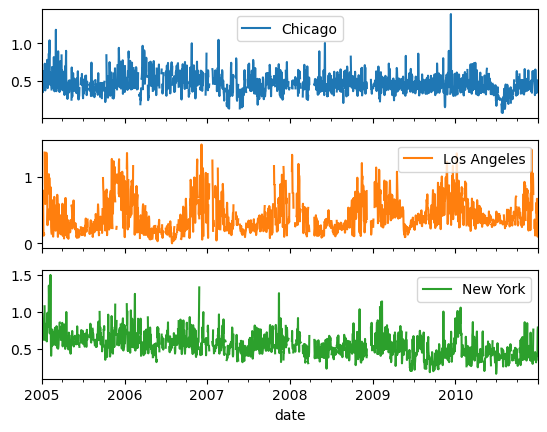

In [16]:
# Plot the data
co.plot(subplots=True)
plt.show()


In [17]:
# Set frequency to monthly
co = co = co.asfreq('M')

#Check new data
co.head(12)

,Chicago,Los Angeles,New York
date,,,
2005-01-31,0.850000,0.800498,0.799479
2005-02-28,0.575000,0.397600,0.780729
2005-03-31,0.412500,0.432972,0.740672
2005-04-30,0.502083,0.291304,0.716382
2005-05-31,0.520834,0.292753,0.615625
2005-06-30,0.479167,0.184265,0.740828
2005-07-31,0.370833,0.141395,0.652837
2005-08-31,0.450000,0.197826,0.523958
2005-09-30,0.466667,0.781250,0.569271


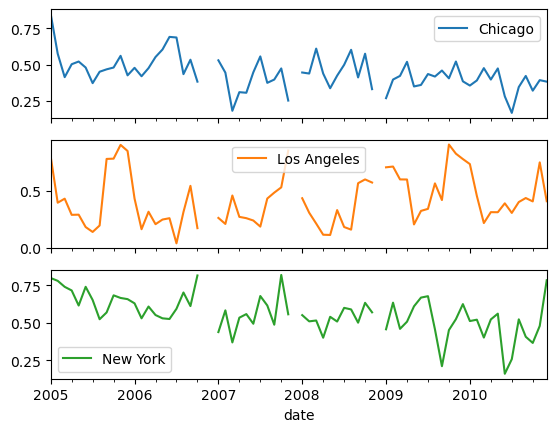

In [18]:
# Plot the data
co.plot(subplots=True)
plt.show()

##### Shifting stock prices across time

shift(), allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [19]:
#loading data
google=pd.read_csv("Datasets/Stock_data-/google.csv")

#checking data
google.head(20)

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10
5,2014-01-07,568.86
6,2014-01-08,570.04
7,2014-01-09,564.55
8,2014-01-10,564.52
9,2014-01-11,NaN


In [20]:
#Info data
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


-Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, setting the result as index and assigning to google.


-Use .asfreq() to set the frequency of google to business daily.


-Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.


-Plot the three columns of google.

In [21]:
# Import data here
google2 = pd.read_csv('Datasets/Stock_data-/google.csv', parse_dates=['Date'], index_col='Date')

#checking data
google2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [22]:
# Set data frequency to business daily
google2 =  google2.asfreq('B')

google2.head(10)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52
2014-01-13,560.93
2014-01-14,574.13


In [23]:
# Create 'lagged' and 'shifted' columns
google2['lagged'] = google2.Close.shift(periods=-90)
google2['shifted'] = google2.Close.shift(periods=90)

google2.head(10)

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN
2014-01-09,564.55,519.98,NaN
2014-01-10,564.52,520.63,NaN
2014-01-13,560.93,528.86,NaN
2014-01-14,574.13,529.77,NaN


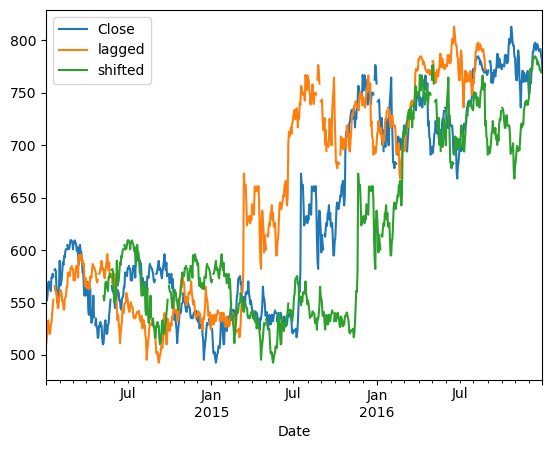

In [24]:
# Plot the google price series
google2.plot()
plt.show()

##### Calculating stock price changes
 Now you'll practice to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [28]:
# Import data here
yahoo = pd.read_csv('Datasets/Stock_data-/yahoo.csv', parse_dates=['date'], index_col='date')
#checking data
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [30]:
#checking data
yahoo.head(20)

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66
2013-01-09,19.33
2013-01-10,18.99
2013-01-11,19.29
2013-01-14,19.43


In [39]:
#Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
yahoo['shifted_30'] = yahoo.price.shift(30)
yahoo.tail()

,price,shifted_30,change_30,diff_30
date,,,,
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64


In [34]:
#Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)
yahoo.tail()

,price,shifted_30,change_30
date,,,
2015-12-25,NaN,32.19,NaN
2015-12-28,33.60,32.94,0.66
2015-12-29,34.04,32.86,1.18
2015-12-30,33.37,32.98,0.39
2015-12-31,33.26,32.62,0.64


In [35]:
#Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'
yahoo['diff_30'] = yahoo.price.diff(30)
# Inspect the last five rows of price
print(yahoo.tail())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [40]:
#Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() 
#of the result to show both columns are equal.
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


0.0    703
dtype: int64


##### Plotting multi-period returns
.pct_change(); Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

In [48]:
google3 = pd.read_csv('Datasets/Stock_data-/google.csv', parse_dates=['Date'], index_col='Date')

google3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [49]:
#inspect data
google3.head(20)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


In [51]:
# Set the frequency to calendar daily
google3 = google3.asfreq('D')

#inspect again
google3.head(20)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


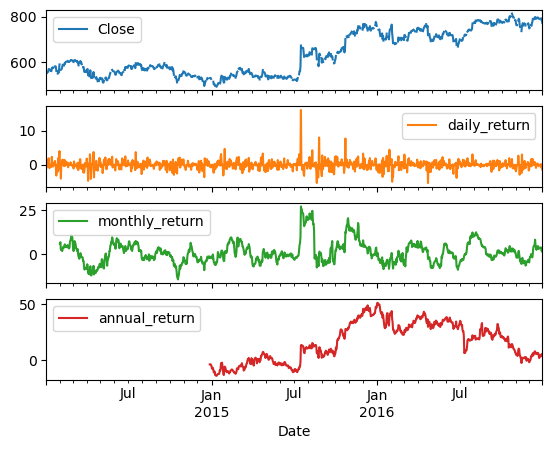

In [53]:
# Create daily_return
google3['daily_return'] = google3.Close.pct_change(1).mul(100)

# Create monthly_return
google3['monthly_return'] = google3.Close.pct_change(30).mul(100)

# Create annual_return
google3['annual_return'] = google3.Close.pct_change(360).mul(100)

# Plot the result
google3.plot(subplots=True)
plt.show()

In [54]:
google3.tail(20)

,Close,daily_return,monthly_return,annual_return
Date,,,,
2016-12-11,NaN,0.000000,4.677595,5.318709
2016-12-12,789.27,-0.002534,4.674942,6.757652
2016-12-13,796.10,0.865357,5.580754,7.681487
2016-12-14,797.07,0.121844,8.285784,7.812690
2016-12-15,797.85,0.097858,5.189258,6.697246
2016-12-16,790.80,-0.883625,3.442863,5.440000
2016-12-17,NaN,0.000000,2.537505,5.396436
2016-12-18,NaN,0.000000,3.978752,5.665420
2016-12-19,794.20,0.429944,4.425803,6.119722
